In [22]:
def pr_var(a,b,c):
    n_sample = 1000000
    shterm = 1+np.random.normal(3.5, 3.1, n_sample)/100
    lcap =  1+np.random.normal(10.1, 20.2, n_sample)/100
    scap =  1+np.random.normal(12.5, 32.3, n_sample)/100
    shterm[shterm<0] = 0
    lcap[lcap<0] = 0
    scap[scap<0] = 0 
    portfolio = a*shterm + b*lcap + c*scap 
    return (a+b+c)-np.array([np.percentile(portfolio,1),np.percentile(portfolio,5),np.percentile(portfolio,8.7)])
pr_var(1,2,7)

array([4.22627587, 2.6684422 , 2.01476231])

In [23]:
import numpy as np
n_sample = 1000000 #large number of iterations, but, of course, it can be changed to accomodate your preference as well.
shterm = 1+np.random.normal(3.5, 3.1, n_sample)/100 #simulated normal distribution with appropriate numbers.
lcap =  1+np.random.normal(10.1, 20.2, n_sample)/100 #simulated normal distribution with appropriate numbers.
scap =  1+np.random.normal(12.5, 32.3, n_sample)/100 #simulated normal distribution with appropriate numbers.
shterm[shterm<0] = 0 #Prevents stock price from going below 0.
lcap[lcap<0] = 0 #Prevents stock price from going below 0.
scap[scap<0] = 0  #Prevents stock price from going below 0.
portfolio = 1*shterm + 2*lcap + 7*scap #infusing the w1*r1+w2*r2+w3*r3 formula with weights 1, 2, 7 respectively as well as respective returns. 
P = sum(1*(portfolio<8))/n_sample  #this formula yields probability of portfolio being worth less than $8 million.
print ("Probability of portfolio being worth less than $8 million in one year = {0:.{1}f}%".format(P*100,2))



Probability of portfolio being worth less than $8 million in one year = 8.71%


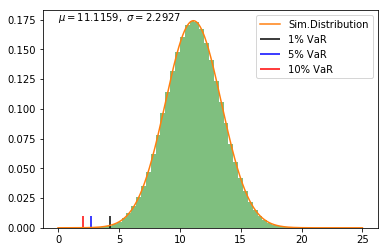

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.hist(portfolio, 50, density=True, facecolor='g', alpha=.5)

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(portfolio))

m, s = np.mean(portfolio),np.std(portfolio) # get mean and standard deviation  
pdf_g = norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") 

VaR1,VaR5,VaR10 = pr_var(1,2,7)
plt.vlines(VaR1, colors='k', ymin=0, ymax=.01)
plt.vlines(VaR5, colors='b', ymin=0, ymax=.01)
plt.vlines(VaR10, colors='r', ymin=0, ymax=.01)

plt.legend(('Sim.Distribution', '1% VaR', '5% VaR','10% VaR'),loc='best')
plt.text(xmin,norm.pdf(m, m, s), r'$\mu='+str(round(m,4))+',\ \sigma='+str(round(s,4))+'$')

plt.savefig('var-thing.png', bbox_inches='tight')
plt.show()  

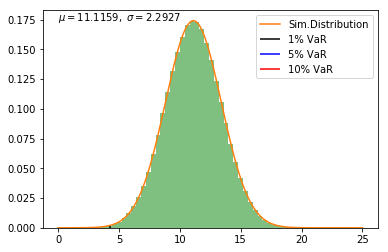

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.hist(portfolio, 50, density=True, facecolor='g', alpha=.5)

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(portfolio))

m, s = np.mean(portfolio),np.std(portfolio) # get mean and standard deviation  
pdf_g = norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") 

VaR1,VaR5,VaR10 = pr_var(1,2,7)
plt.vlines(VaR1, colors='k', ymin=0, ymax=norm.pdf(VaR1, m, s))
plt.vlines(VaR5, colors='b', ymin=0, ymax=norm.pdf(VaR5, m, s))
plt.vlines(VaR10, colors='r', ymin=0, ymax=norm.pdf(VaR10, m, s))

plt.legend(('Sim.Distribution', '1% VaR', '5% VaR','10% VaR'),loc='best')
plt.text(xmin,norm.pdf(m, m, s), r'$\mu='+str(round(m,4))+',\ \sigma='+str(round(s,4))+'$')

plt.savefig('var-thing.png', bbox_inches='tight')
plt.show()  